In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'March 2017'

<h2>Основная таблица</h2>

In [6]:
rep_2016_17 = report['2016':] # данные с 2016 по н.в.
rep_2016_17

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     4471   1253        537  123  316     6    160     367      16
2016-02-29     5630   1683        597   88  543    19    264     533      10
2016-03-31     5946   1641        530  101  514    22    217     571      20
2016-04-30     5887   1470        479   69  228    24    196     484      12
2016-05-31     5846   1183        361   87    0    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8
2017-02-28     2701   2414        282  486    0     8    197     311      14
2017-03-31     2590   2283        284  426    0    11    157     298      11

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-03-31     -111   -131          2 -60   0     3    -40     -13      -3

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

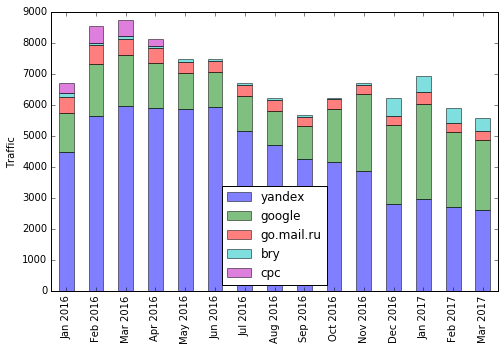

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2016_17.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2016_17.index]);

<h3>Линейная диаграмма изменений трафика</h3>

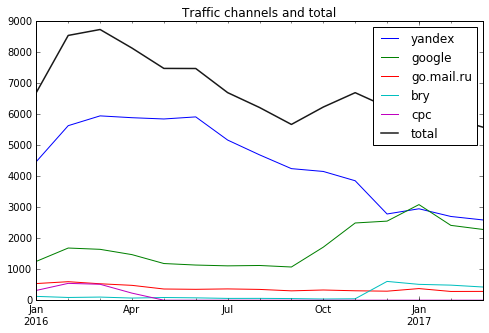

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2016_17.channels.plot(ax=ax);
rep_2016_17.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data[kw]

keyword  visit
bing   0                                    двери беленый дуб     23
       1                          магазин межкомнатных дверей     21
       2                                   двери межкомнатные     20
       3                                       двери недорого     18
       4                       двери с доставкой и установкой     16
       5                                       двери под ключ     14
       6                                                двери     13
       7                                     двери со скидкой     13
       8                    купить межкомнатные двери экошпон     13
       9                         межкомнатные двери с замками     11
       10                                двери ламинированные     10
       11                           двери ульяновские каталог     10
       12                              входные двери недорого      9
       13                             входные двери с замками      9
       14                                   двери белорусские      9
       15                                  двери с фурнитурой      9
       16                                         двери эмаль      9
       17                                         двери софья      8
       18                               дешевые входные двери      8
       19                             интернет магазин дверей      8
       20                                  межкомнатные двери      8
       21                       межкомнатные двери с зеркалом      8
       22                                          двери купе      7
       23                                        двери эконом      7
       24                       ламинированные двери недорого      7
       25                              двери из массива сосны      6
       26              ульяновские двери межкомнатные каталог      6
       27                                     двери в наличии      5
       28                                      двери регионов      5
       29                                 двери шпонированные      5
...                                                       ...    ...
yandex 710                          стекла для дверей полотно      1
       711                   стеклить кухонные двери в мытищи      1
       712                          стекло для кухонной двери      1
       713                   стекло для кухонной двери 48 130      1
       714                           стекло на кухонную дверь      1
       715                      стекло на кухонную дверь цена      1
       716             стеклянные двери для кухни фото и цены      1
       717             стеклянные двери для кухни фото и цены      1
       718                     стеклянные двери на кухню фото      1
       719             стеклянные двери с аркой на кухню фото      1
       720                        стеклянные дверцы для кухни      1
       721            стеклянные матовые двери для кухни фото      1
       722           стоимость дверных полотен для антресолей      1
       723  строительные сантехническое дверное полотно 30...      1
       724                     технологическая кухонная дверь      1
       725             толщина дверного полотна межкомнатного      1
       726                         удлинение дверного полотна      1
       727          уплотнитель дверных проемов газ 21 купить      1
       728        установить дверное полотно в старую коробку      1
       729           фабрика дверных полотен официальный сайт      1
       730           фабрика полотен дверных официальный сайт      2
       731  характеристики артикул 18266211 гарантия 1 год...      1
       732                    цветное стекло в кухонную дверь      1
       733                       чем утеплять дверное полотно      1
       734           что такое дверной блок с глухим полотном      1
       735                         что такое полотно на дверь      1
       736                            ширина дверног

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери беленый дуб,23
go.mail.ru,межкомнатные двери недорого,31
google,np - /?cnt=catalog&r=2438,860
rambler,двери книжка межкомнатные,1
yahoo,np - /,4
yandex,(not set),1692


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                  двери беленый дуб     23
           1                        магазин межкомнатных дверей     21
           2                                 двери межкомнатные     20
           3                                     двери недорого     18
           4                     двери с доставкой и установкой     16
go.mail.ru 0                        межкомнатные двери недорого     31
           1                 купить двери межкомнатные недорого      9
           2                      двери раздвижные межкомнатные      7
           3            межкомнатные двери эконом класса москва      7
           4                                      тук тук двери      6
google     0                          np - /?cnt=catalog&r=2438    860
           1                          np - /?cnt=catalog&r=1428    481
           2                                             np - /    284
           3                                   np - /?pid=pokaz    101
           4                          np - /?cnt=catalog&r=1010     99
rambler    0                          двери книжка межкомнатные      1
           1                     двери тук-тук официальный сайт      1
           2                дешевые межкомнатные складные двери      1
           3                                    недорогие двери      1
           4         раздвежные двери гармошкой купить в москве      1
yahoo      0                                             np - /      4
           1                          np - /?cnt=catalog&r=1428      2
           2                            np - /?pid=menu-katalog      1
           3                               np - /?pid=pricelist      1
           4                      двери межкомнатные раскладные      1
yandex     0                                          (not set)   1692
           1  межкомнатные двери недорого с установкой под ключ     45
           2           межкомнатные двери недорого с установкой     21
           3  межкомнатные двери недорого с установкой под к...     11
           4                                       took-took.ru      9